In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

# load Boston Dataset from sklearn datasets

In [2]:
boston = datasets.load_boston()
# print(boston.DESCR)

In [3]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## just use 'RM' as our feature

In [4]:
x = boston.data[:,5] # just select the 6th colume, feature: 'RM' 
x.shape

(506,)

In [5]:
y = boston.target
y.shape

(506,)

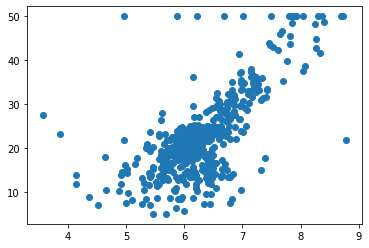

In [6]:
plt.scatter(x, y)
plt.show()

## remove biggest y

In [7]:
np.max(y)

50.0

In [8]:
x = x[y < 50.0]
y = y[y < 50.0]

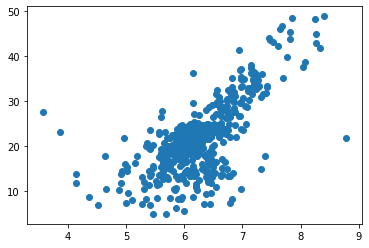

In [9]:
plt.scatter(x, y)
plt.show()

## Prepare train data and test data

In [10]:
from model_selection import train_test_split
x_train, y_train, x_test, y_test = train_test_split(x, y, seed = 666)

In [11]:
x_train.shape

(392,)

In [12]:
x_test.shape

(98,)

## Fit my Sample Linear Regression model

In [13]:
from SimpleLinearRegression import SimpleLinearRegression
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression2()

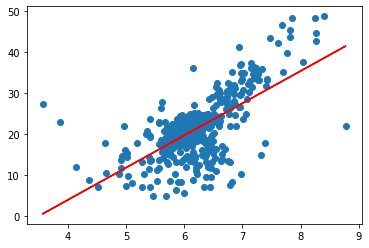

In [14]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color = 'r')
plt.show()

In [15]:
y_predict = reg.predict(x_test)

# Performance Measures

## Naive way

### MSE

In [16]:
mse = np.sum((y_predict - y_test) ** 2 ) / len(y_test)
mse

24.156602134387438

### RMSE

In [17]:
from math import sqrt

rmse = sqrt(mse)
rmse

4.914936635846635

### MAE

In [18]:
mae = np.sum(np.absolute(y_predict - y_test)) / len(y_test)
mae

3.5430974409463873

### Why MAE is smaller than RMSE 

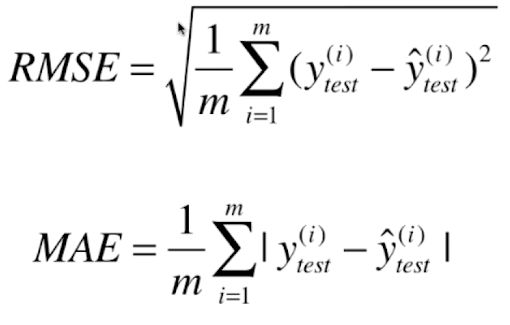

RMSE can amplify the effects of individual errors

### Use my metrics module

In [19]:
from metrics import mean_squared_error
from metrics import root_mean_squared_error
from metrics import mean_abusolute_error

In [20]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [21]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [22]:
mean_abusolute_error(y_test, y_predict)

3.5430974409463873

### Use MSE and MAE of scikit-learn

No RMSE in Scikit-learn

In [23]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [24]:
mean_squared_error(y_test, y_predict)

24.156602134387438

In [25]:
mean_abusolute_error(y_test, y_predict)

3.5430974409463873

### The problem of MAE and RMSE 

We can't know whether the performance is good or bad denpands on the result.  
E.g. Price is 1000 and RMES or MAE is 5 

## R Squared

Compare our model with Baseline Model(precidiction always be the mean value) 

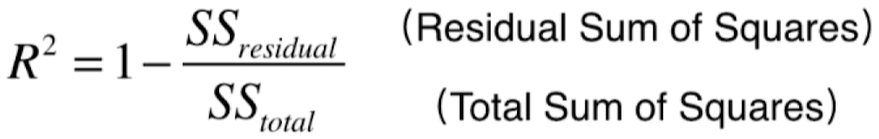

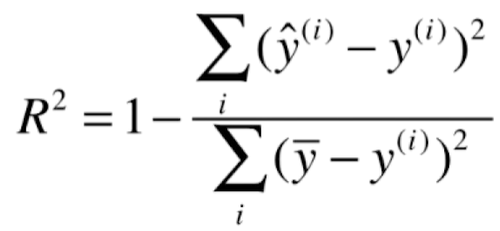

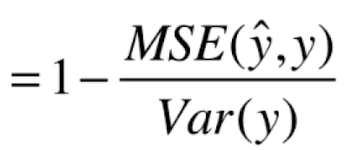

+ R^2 <= 1
+ R^2 is bigger, the performance is better. 
+ If R^2 == 1:  Our model is 100% perfict, .
+ If R^2  == 0:  the performance of our model is as same as baseline Model
+ If R^2 < 0:  our model is worse than baseline model. Maybe there is no liner relationship in the dataset or we choose the wrong features

### Use my r2

In [26]:
1 - mean_squared_error(y_test, y_predict) / np.var(y_test)

0.6129316803937322

In [27]:
from metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937322

### R2 in SK-learn

In [28]:
from sklearn.metrics import r2_score
r2_score(y_test, y_predict)

0.6129316803937324